In [3]:
from hp_lattice import *
from dwave.samplers import SimulatedAnnealingSampler

# QUBO Formulation

## $S_4$

Sequence (0 = P, 1 = H): [1, 0, 0, 1]
Sequence length = 4
Lattice dimensions : [3, 3]
Created QBM with bit sequence keys.
bit vector has size 18, each with 14.11111111111111 connections on average.
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 2315500, 'sampling_ns': 229330167, 'postprocessing_ns': 220625}}
Received sample set
EHP = -1.0, E1 = 8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -0.9999999999999991
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 465500, 'sampling_ns': 226918042, 'postprocessing_ns': 176041}}
Received sample set
EHP = -1.0, E1 = 8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -0.9999999999999991
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 467750, 'sampling_ns': 226064125, 'postprocessing_ns': 17087

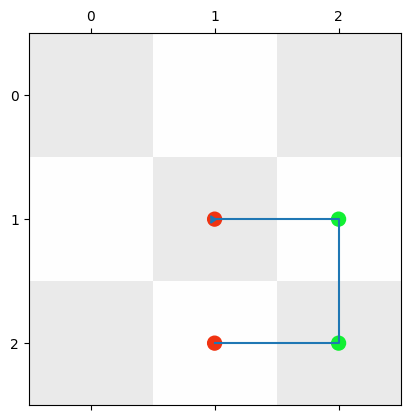

In [2]:
model = Lattice_HP_QUBO(
    dim = [3, 3],
    sequence="HPPH",
    Lambda=(2.1, 2.4, 3.0),
)

sampler = SimulatedAnnealingSampler()

mysamples = []
success_energy = -1
successful_samples = []

betas=[1.05**j for j in range(25)]
for i in range(0, 5):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_qubo(
        model.interaction_matrix(),
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=1,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

# for s in mysamples:
#     model.show_lattice(s)
model.show_lattice(mysamples[0])

## $S_{10}$

Sequence (0 = P, 1 = H): [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Sequence length = 10
Lattice dimensions : [3, 4]
Created QBM with bit sequence keys.
bit vector has size 60, each with 23.966666666666665 connections on average.
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 487000, 'sampling_ns': 737345667, 'postprocessing_ns': 382667}}
Received sample set
EHP = -4.0, E1 = -8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -4.000000000000001
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 493917, 'sampling_ns': 763630500, 'postprocessing_ns': 193958}}
Received sample set
EHP = -4.0, E1 = -8.881784197001252e-16, E2 = 0.0, E3 = 0.0, E = -4.000000000000001
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 460791, 'sampling_ns': 736073792, 'postpr

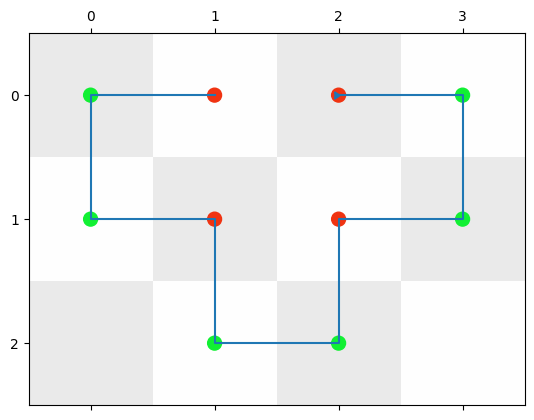

In [3]:
model = Lattice_HP_QUBO(
    dim = [3, 4],
    sequence="HPPHPPHPPH",
    Lambda=(2.1, 2.4, 3.0),
)

sampler = SimulatedAnnealingSampler()

mysamples = [] 

betas=[1.05**j for j in range(25)]
for i in range(0, 5):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_qubo(
        model.interaction_matrix(),
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=1,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

# for s in mysamples:
#     model.show_lattice(s)
model.show_lattice(mysamples[0])

# Ising formulation

In [1]:
from dimod.utilities import qubo_to_ising

## $S_4$

In [6]:
model = Lattice_HP_QUBO(
    dim = [3, 3],
    sequence="HPPH",
    Lambda=(2.1, 2.4, 3.0),
)
Q_qubo = model.interaction_matrix()
h_ising, J_ising, offset_ising = qubo_to_ising(Q_qubo)

sampler = SimulatedAnnealingSampler()

Sequence (0 = P, 1 = H): [1, 0, 0, 1]
Sequence length = 4
Lattice dimensions : [3, 3]
Created QBM with bit sequence keys.
bit vector has size 18, each with 14.11111111111111 connections on average.


In [16]:
i1, i2 = list(Q_qubo.keys())[0]

In [18]:
i2

((1, 0), 3)

In [16]:
h_ising

{((0, 0), 0): 4.75,
 ((1, 0), 3): 3.45,
 ((0, 1), 3): 3.45,
 ((1, 1), 0): 2.75,
 ((0, 2), 0): 4.75,
 ((1, 2), 3): 3.45,
 ((2, 0), 0): 4.75,
 ((2, 1), 3): 3.45,
 ((2, 2), 0): 4.75,
 ((0, 0), 2): 6.75,
 ((0, 2), 2): 6.75,
 ((1, 1), 2): 3.75,
 ((2, 0), 2): 6.75,
 ((2, 2), 2): 6.75,
 ((0, 1), 1): 5.7,
 ((1, 0), 1): 5.7,
 ((1, 2), 1): 5.7,
 ((2, 1), 1): 5.7}

In [14]:
J_ising

{(((0, 0), 0), ((1, 0), 3)): -0.25,
 (((0, 0), 0), ((0, 1), 3)): -0.25,
 (((1, 1), 0), ((0, 1), 3)): -0.25,
 (((0, 2), 0), ((0, 1), 3)): -0.25,
 (((0, 2), 0), ((1, 2), 3)): -0.25,
 (((2, 0), 0), ((1, 0), 3)): -0.25,
 (((1, 1), 0), ((1, 0), 3)): -0.25,
 (((1, 1), 0), ((2, 1), 3)): -0.25,
 (((1, 1), 0), ((1, 2), 3)): -0.25,
 (((2, 2), 0), ((1, 2), 3)): -0.25,
 (((2, 0), 0), ((2, 1), 3)): -0.25,
 (((2, 2), 0), ((2, 1), 3)): -0.25,
 (((0, 0), 0), ((0, 2), 0)): 0.525,
 (((0, 0), 0), ((1, 1), 0)): 0.525,
 (((0, 0), 0), ((2, 0), 0)): 0.525,
 (((0, 0), 0), ((2, 2), 0)): 0.525,
 (((0, 2), 0), ((0, 0), 0)): 0.525,
 (((0, 2), 0), ((1, 1), 0)): 0.525,
 (((0, 2), 0), ((2, 0), 0)): 0.525,
 (((0, 2), 0), ((2, 2), 0)): 0.525,
 (((1, 1), 0), ((0, 0), 0)): 0.525,
 (((1, 1), 0), ((0, 2), 0)): 0.525,
 (((1, 1), 0), ((2, 0), 0)): 0.525,
 (((1, 1), 0), ((2, 2), 0)): 0.525,
 (((2, 0), 0), ((0, 0), 0)): 0.525,
 (((2, 0), 0), ((0, 2), 0)): 0.525,
 (((2, 0), 0), ((1, 1), 0)): 0.525,
 (((2, 0), 0), ((2, 2), 0)):

Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 618209, 'sampling_ns': 454942416, 'postprocessing_ns': 158459}}
Received sample set
EHP = -12.0, E1 = 104.99999999999991, E2 = 21.599999999999998, E3 = 72.0, E = 186.5999999999999
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 458125, 'sampling_ns': 452508666, 'postprocessing_ns': 156542}}
Received sample set
EHP = -12.0, E1 = 104.99999999999991, E2 = 21.599999999999998, E3 = 72.0, E = 186.5999999999999
Asking SA sampler for a sample
{'beta_range': [1.0, 3.225099943713703], 'beta_schedule_type': 'custom', 'timing': {'preprocessing_ns': 347583, 'sampling_ns': 451565333, 'postprocessing_ns': 163167}}
Received sample set
EHP = -12.0, E1 = 104.99999999999991, E2 = 21.599999999999998, E3 = 72.0, E = 186.5999999999999
Asking SA sampler for a sample
{'beta_range': [1.0, 3.2

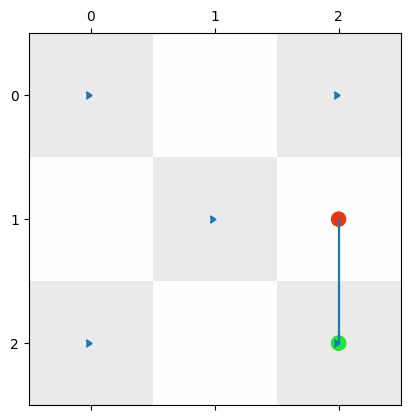

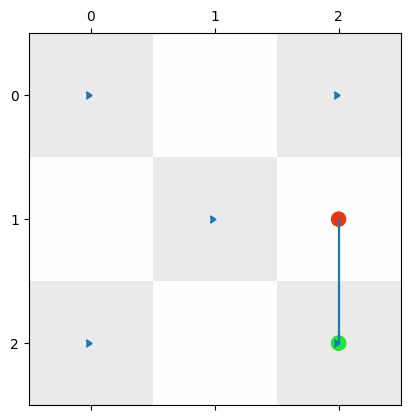

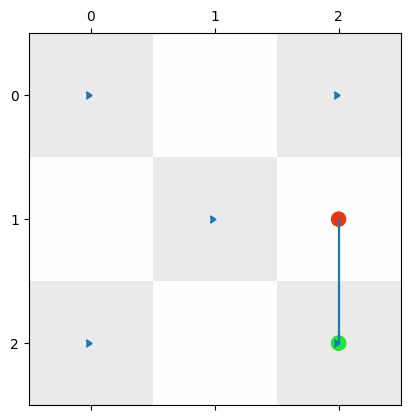

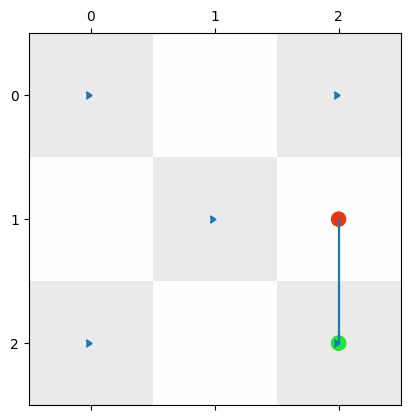

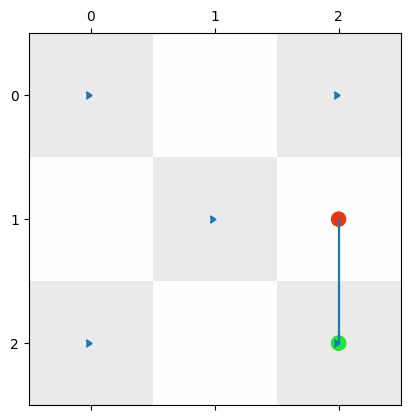

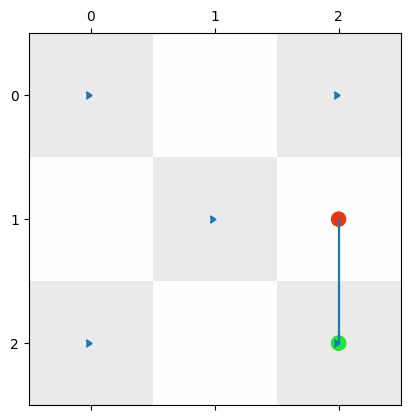

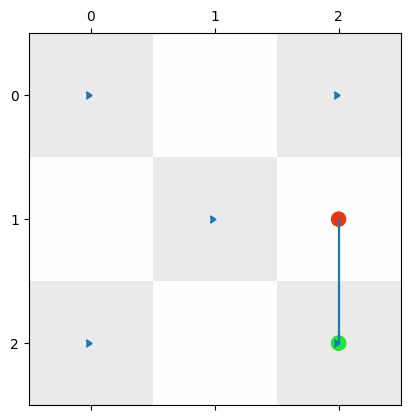

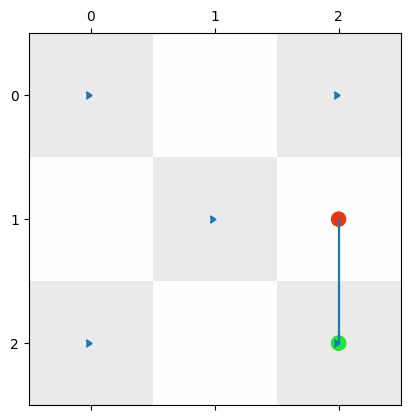

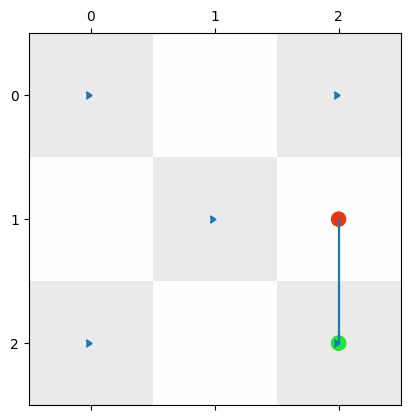

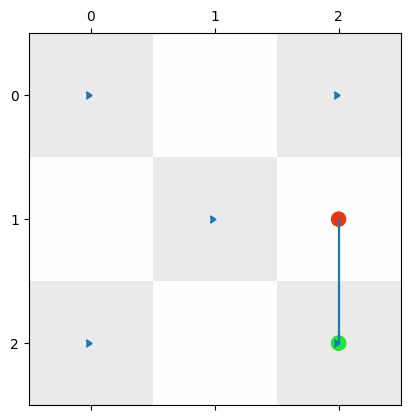

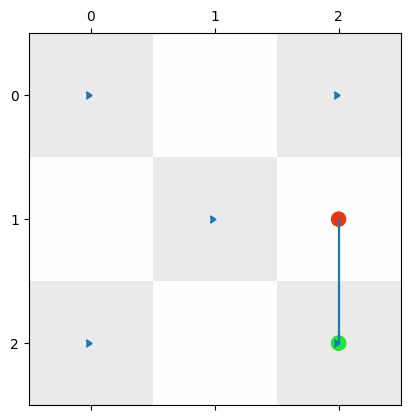

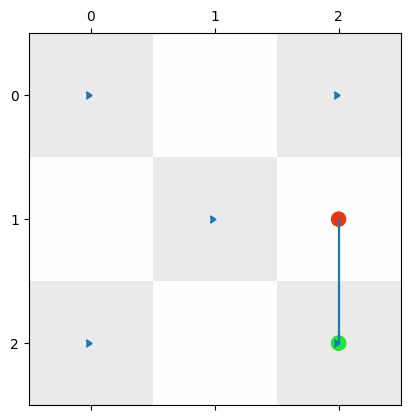

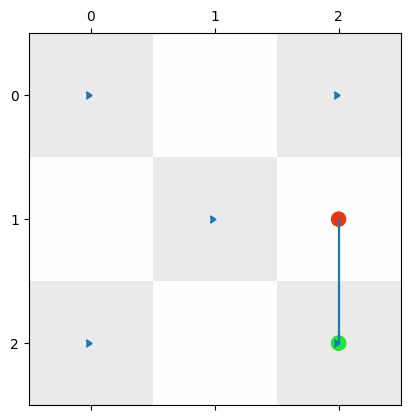

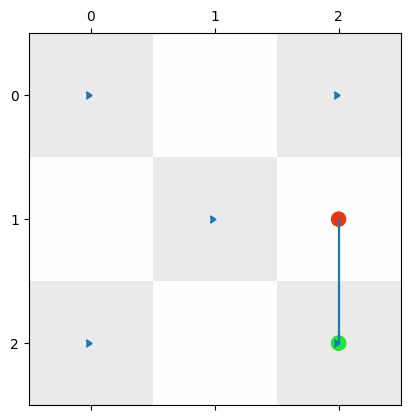

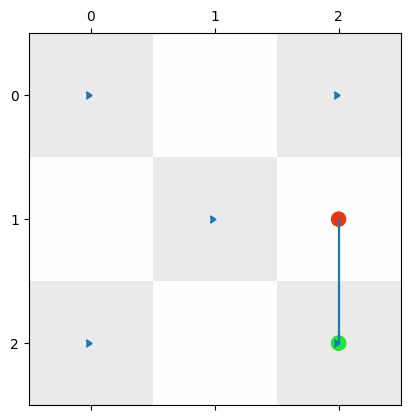

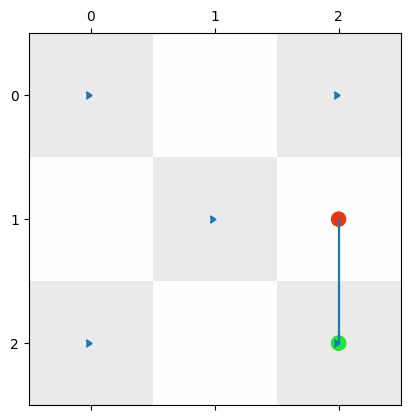

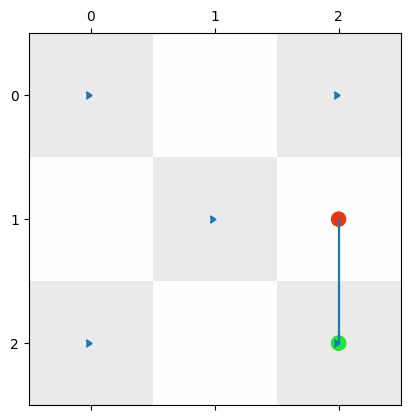

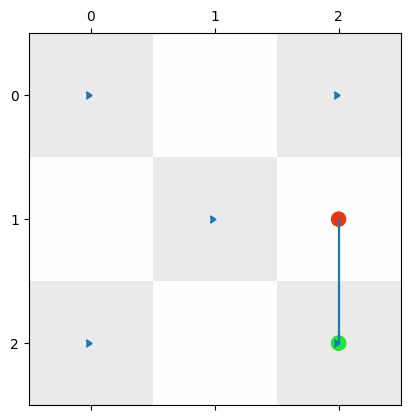

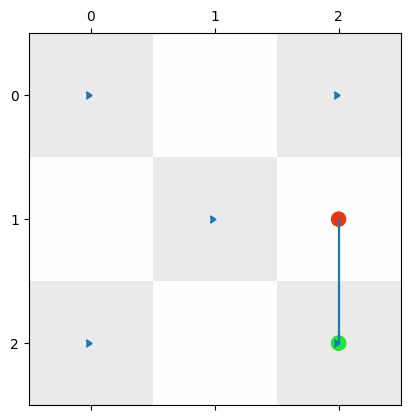

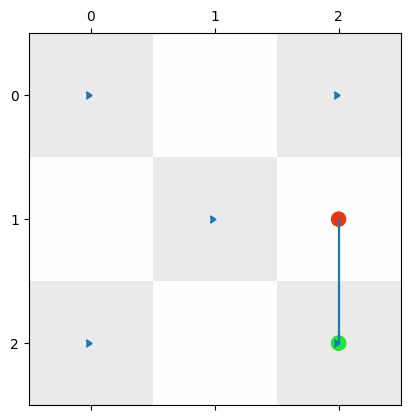

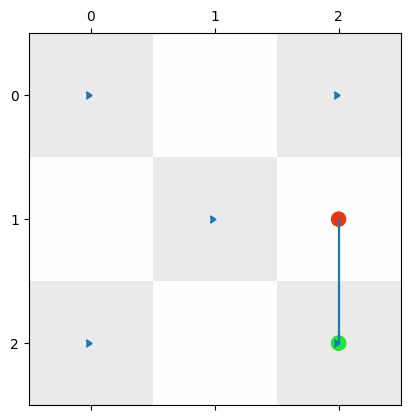

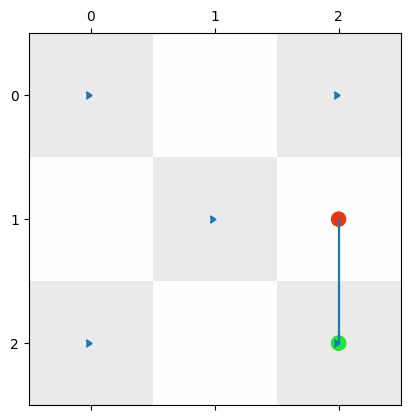

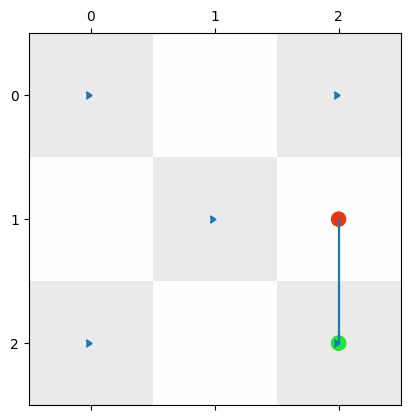

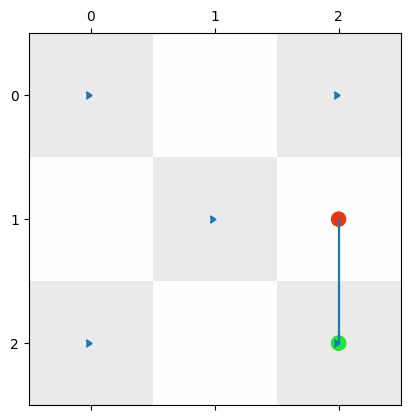

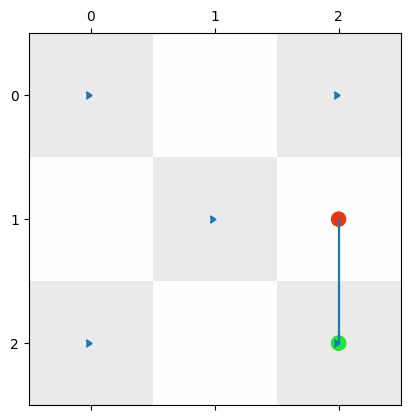

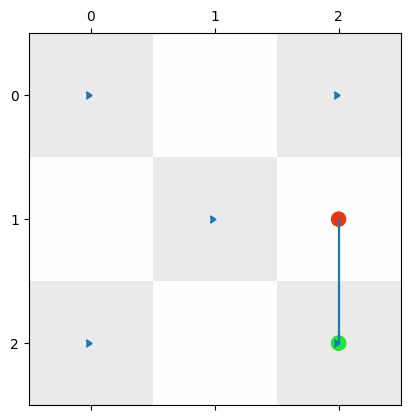

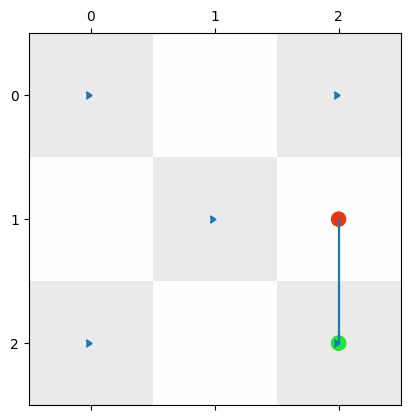

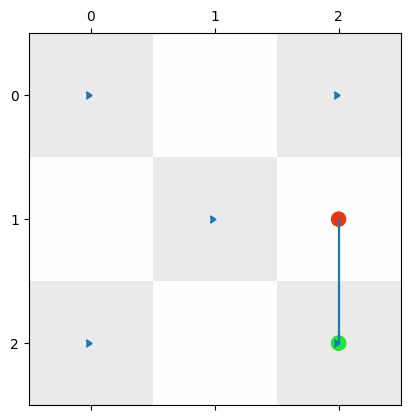

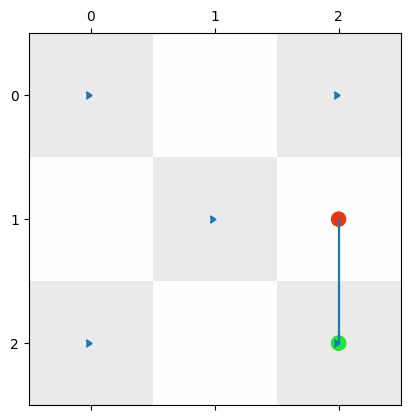

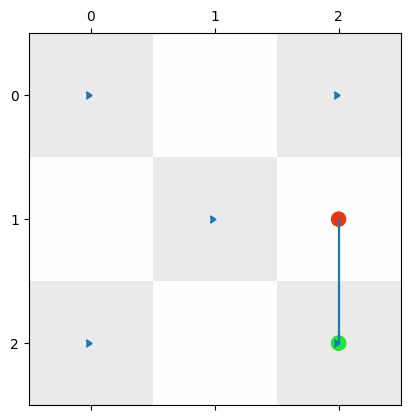

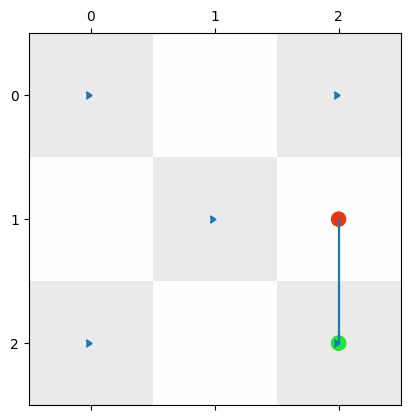

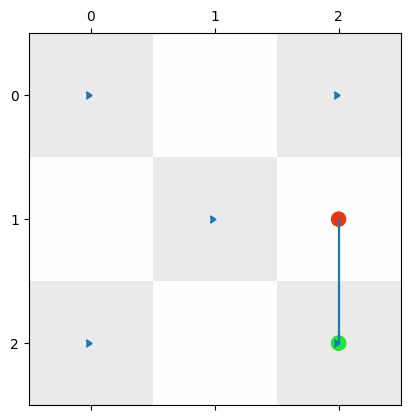

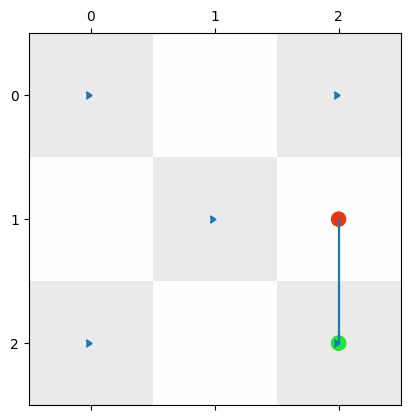

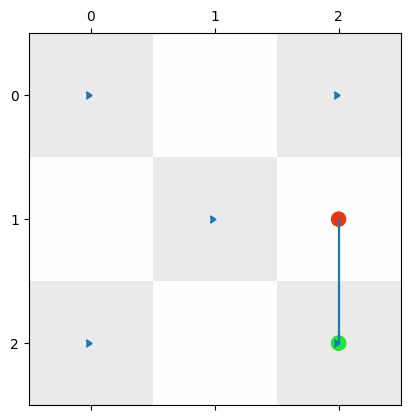

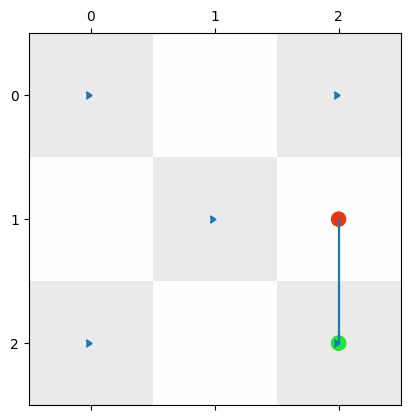

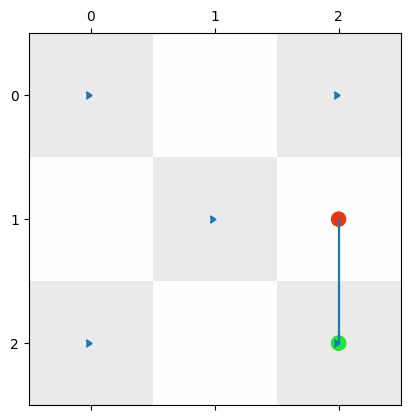

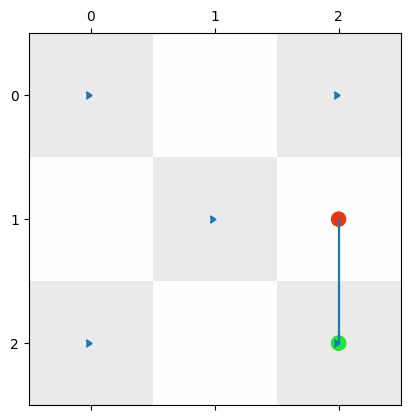

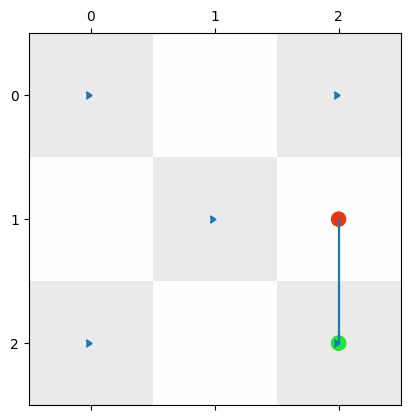

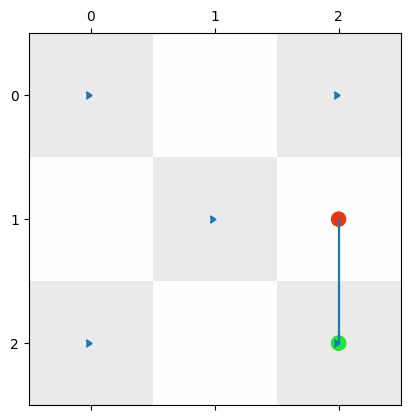

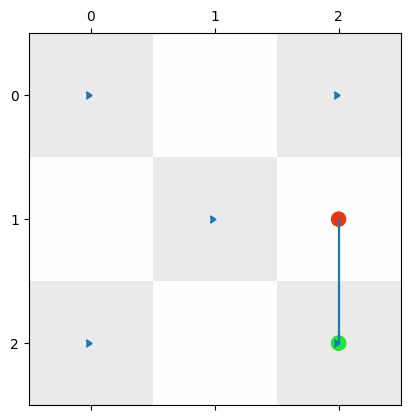

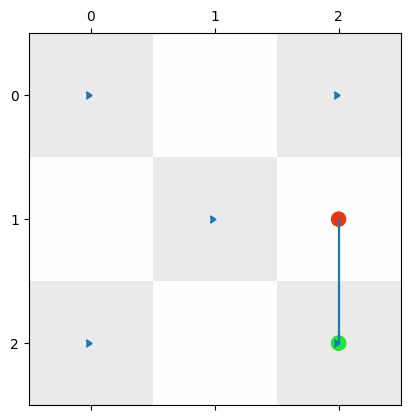

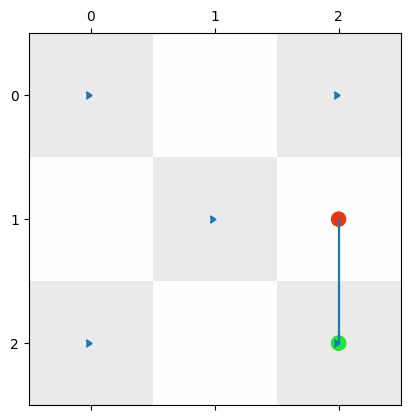

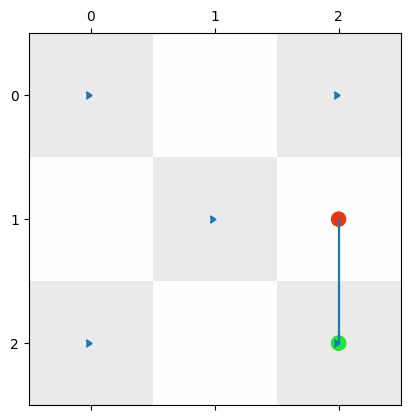

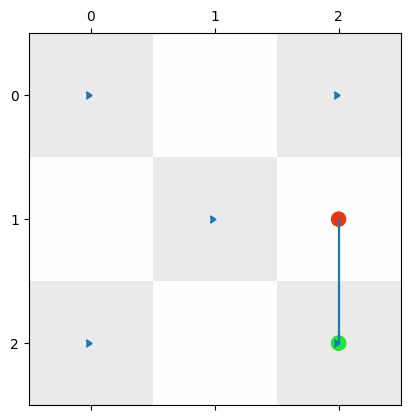

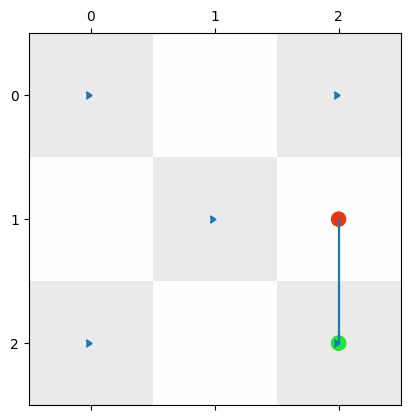

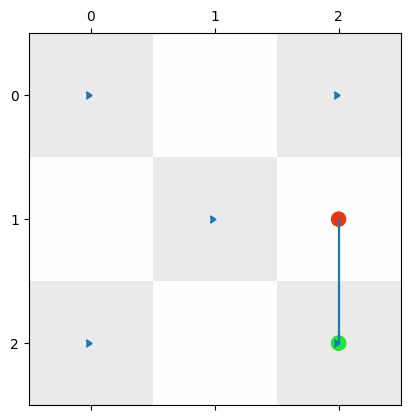

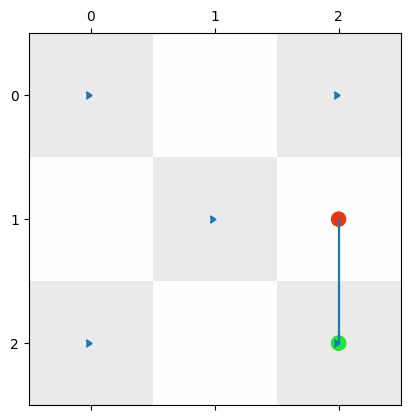

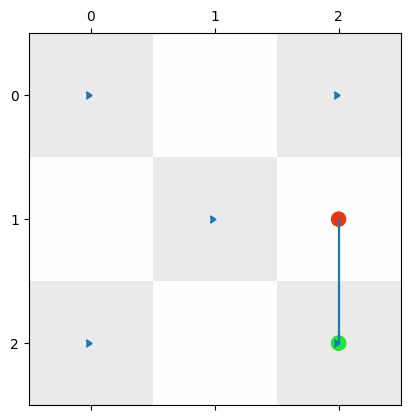

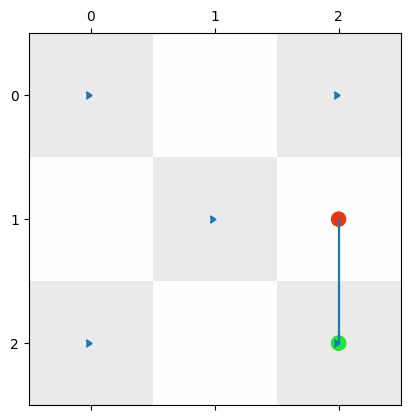

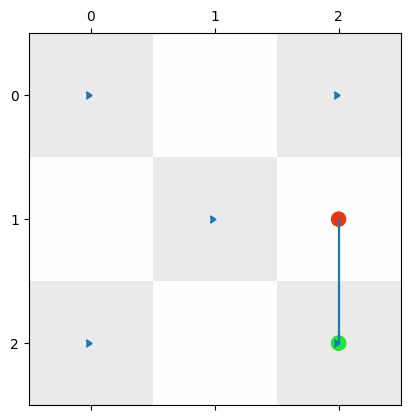

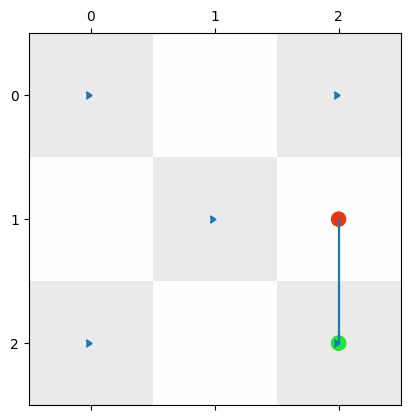

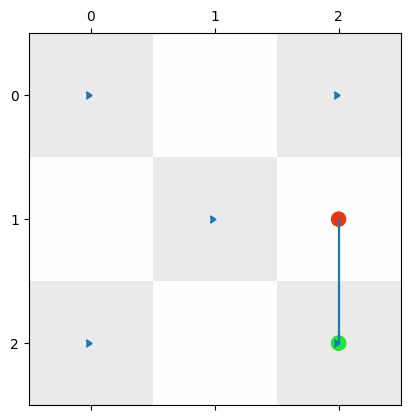

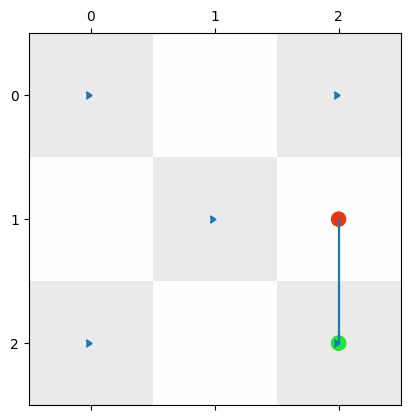

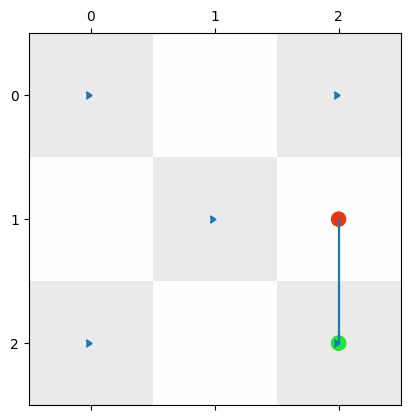

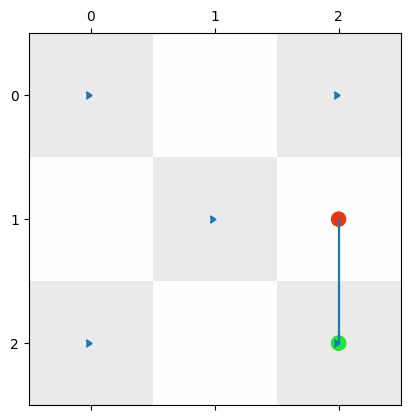

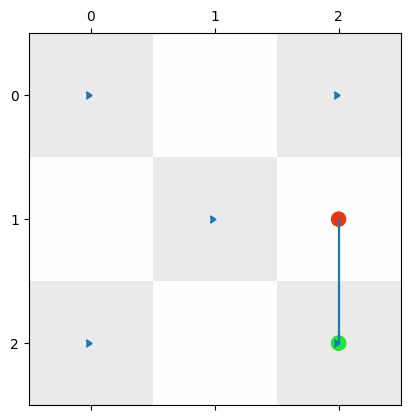

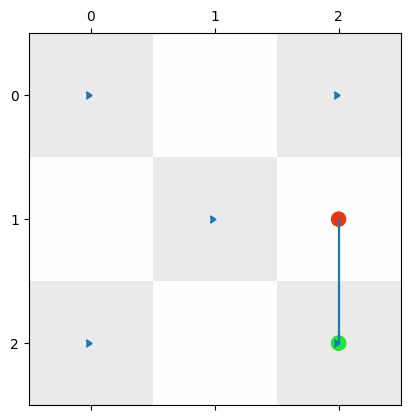

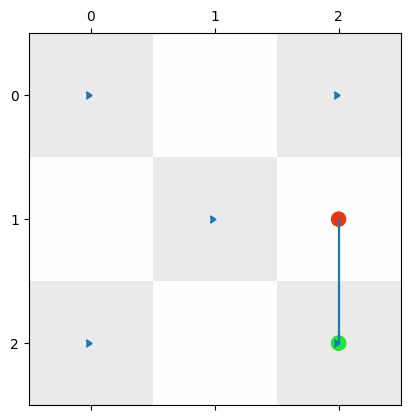

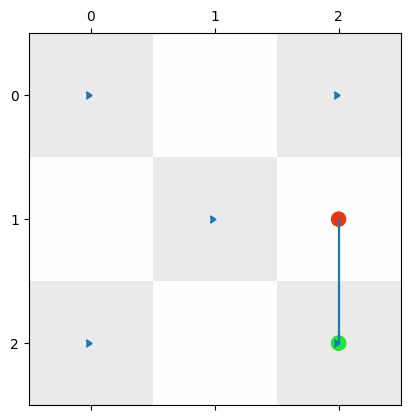

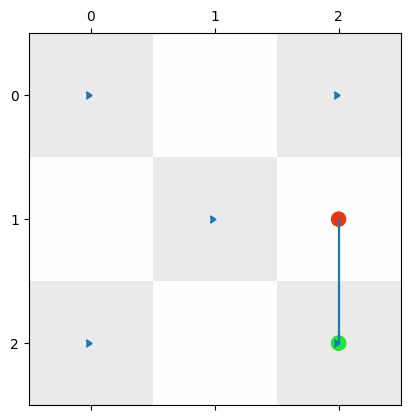

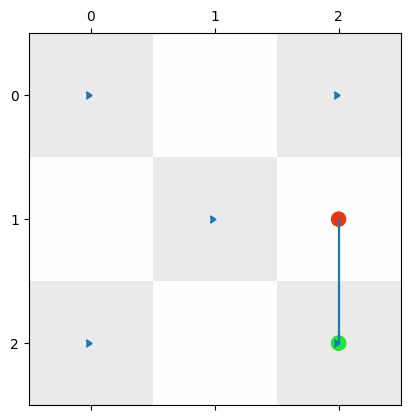

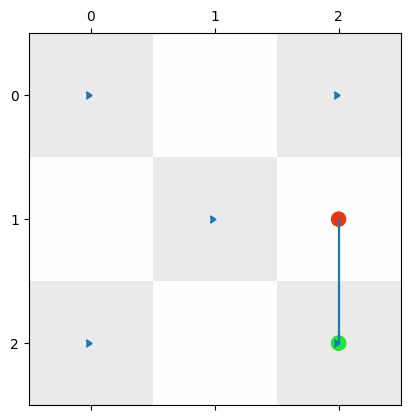

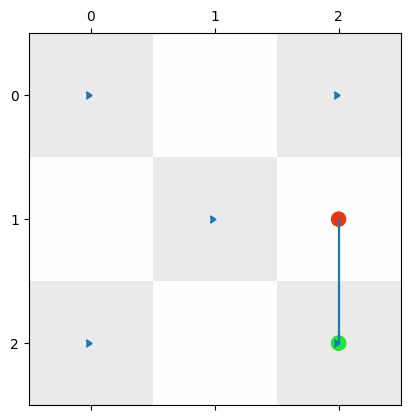

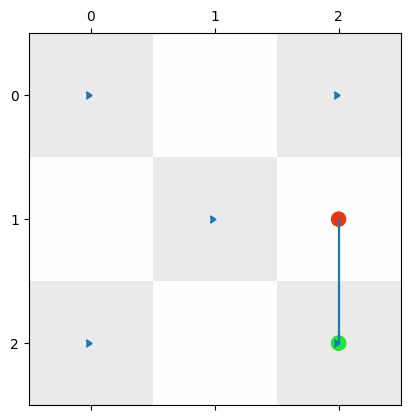

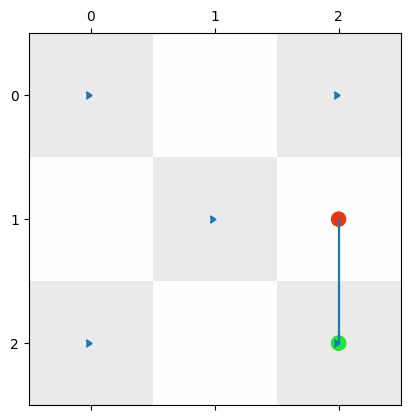

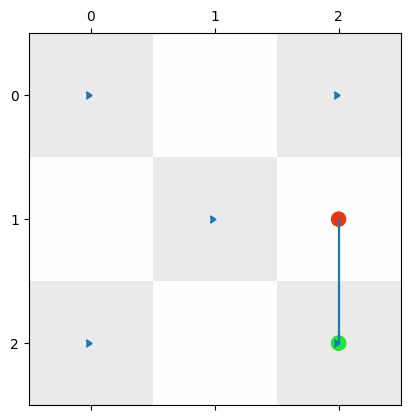

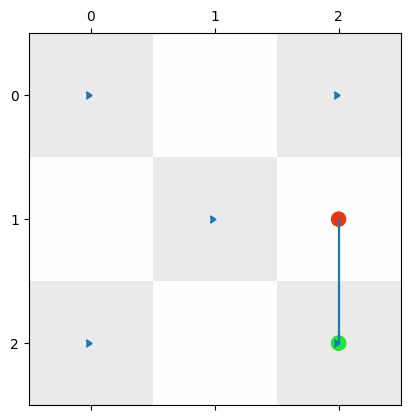

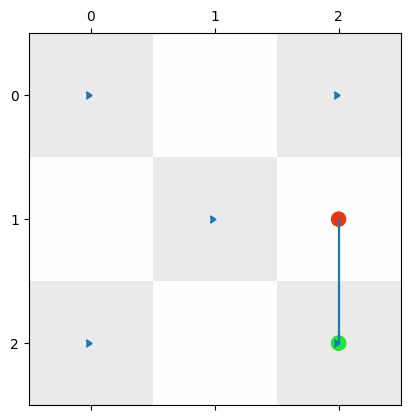

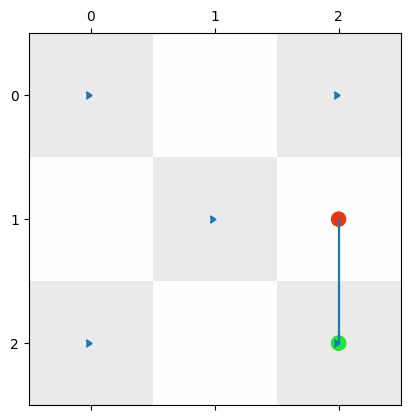

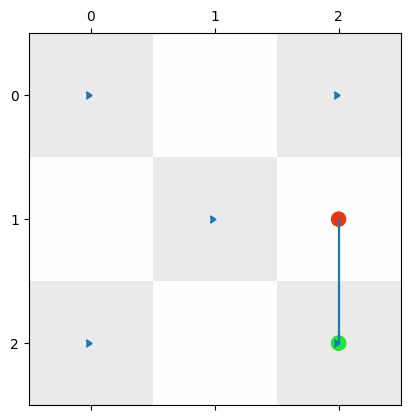

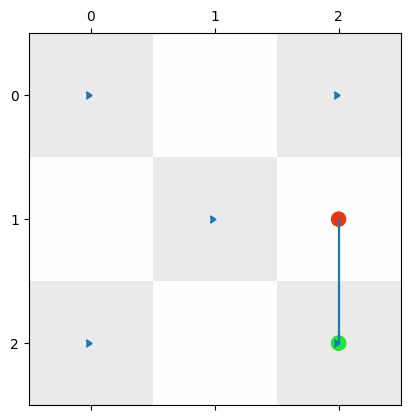

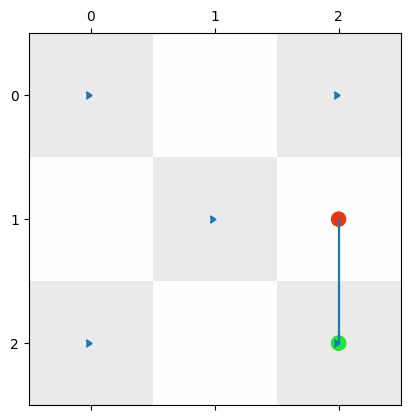

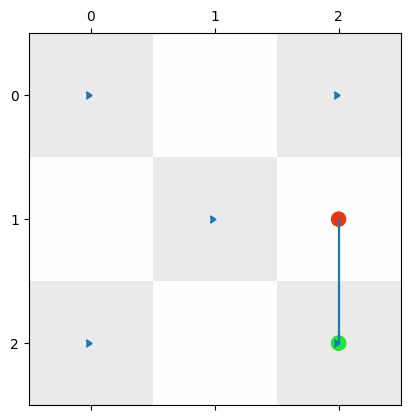

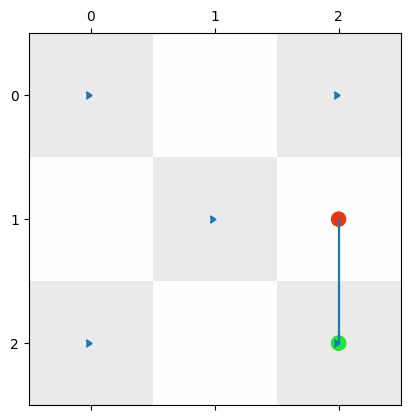

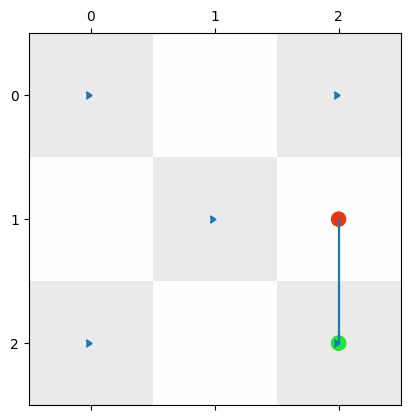

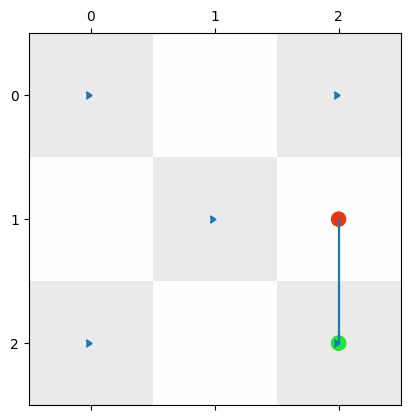

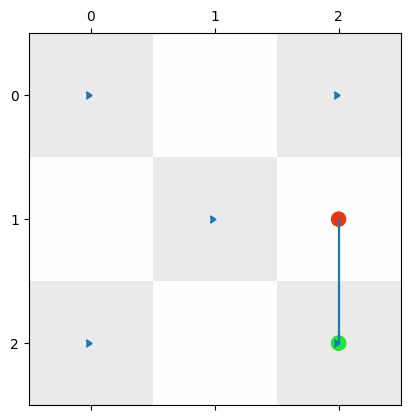

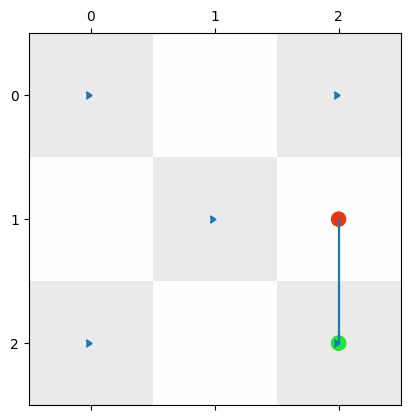

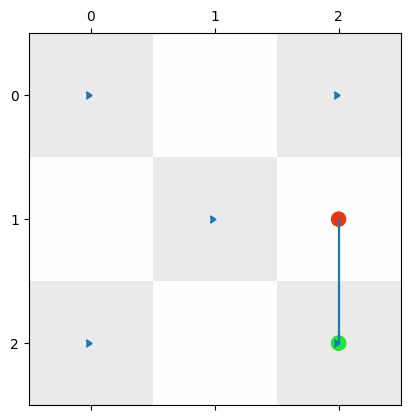

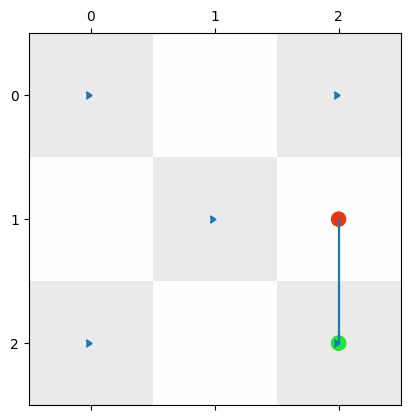

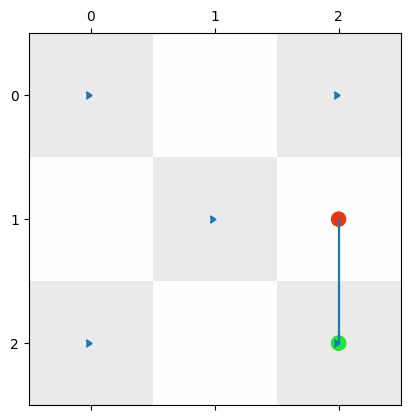

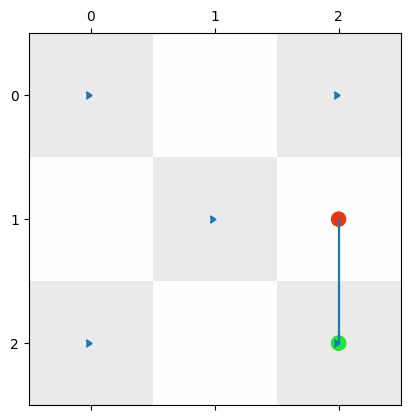

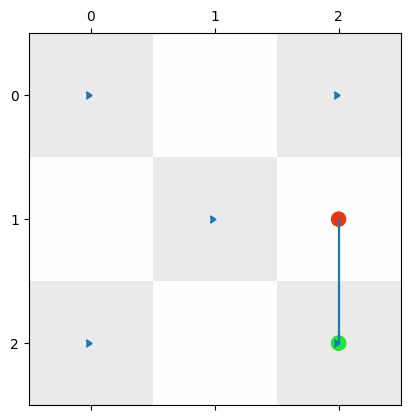

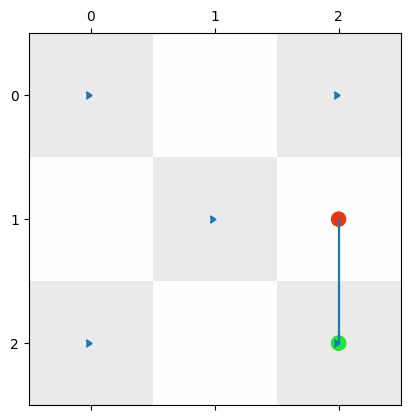

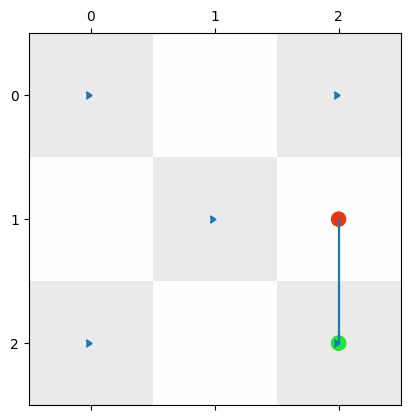

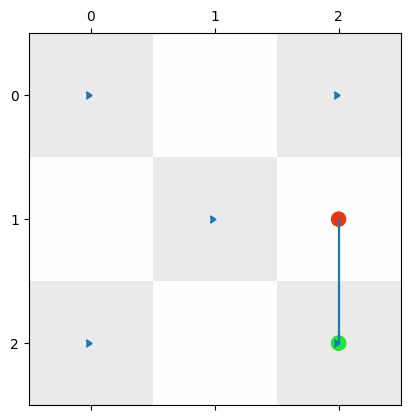

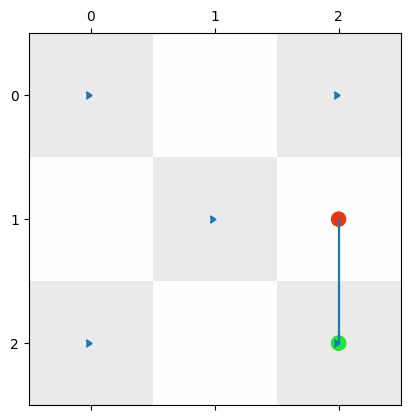

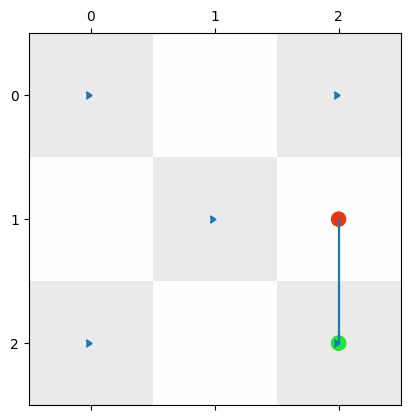

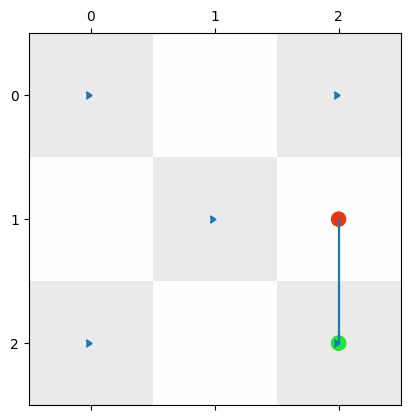

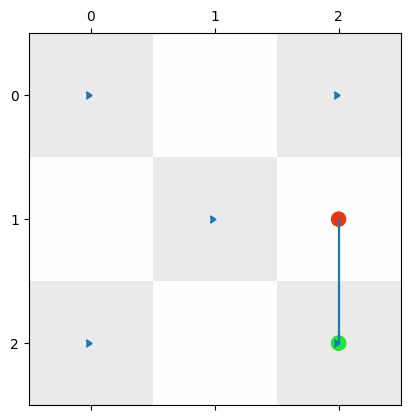

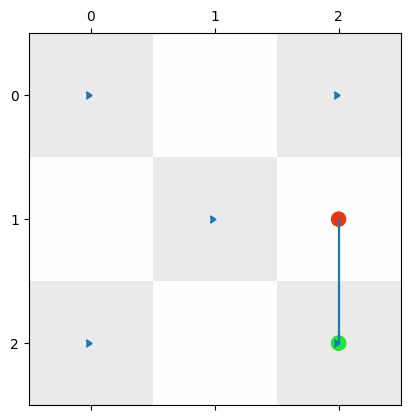

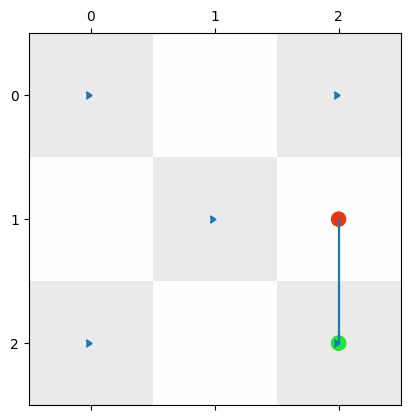

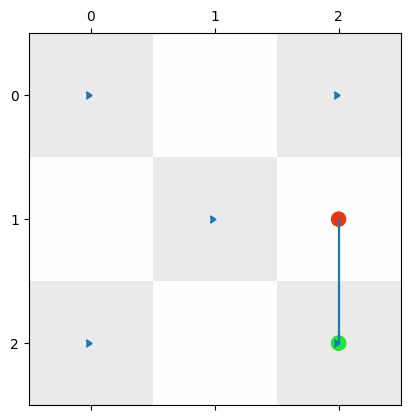

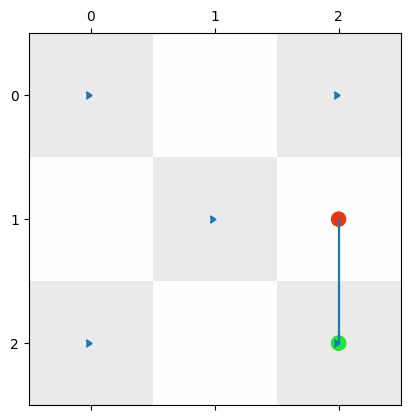

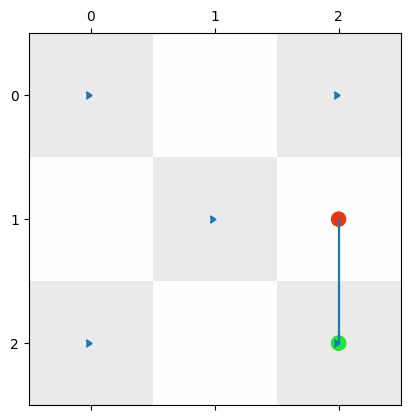

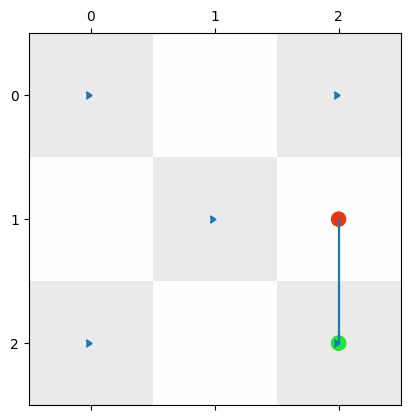

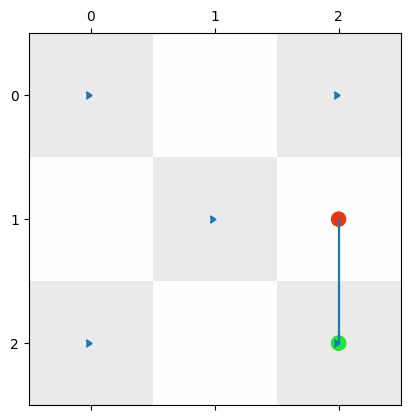

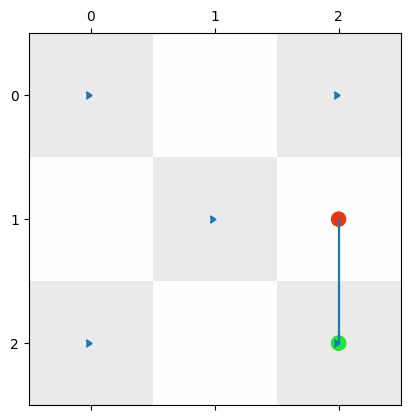

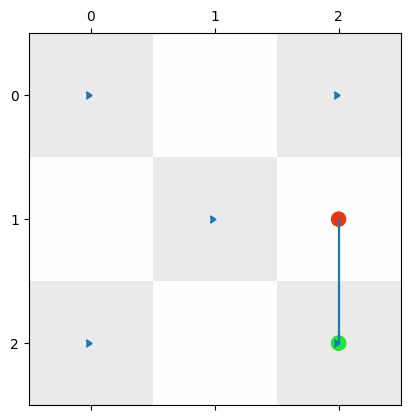

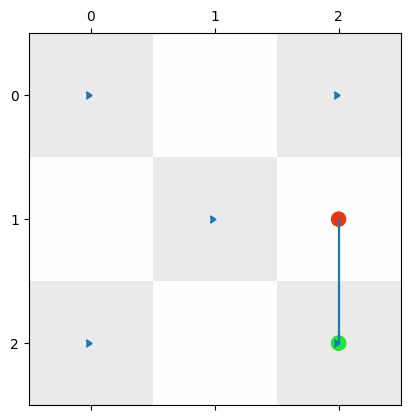

In [13]:
mysamples = [] 

betas=[1.05**j for j in range(25)]
for i in range(0, 100):
    print("Asking SA sampler for a sample")
    sampleset = sampler.sample_ising(
        h_ising, J_ising,
        offset=offset_ising,
        beta_schedule_type='custom',
        beta_schedule=betas,
        beta_range=[min(betas), max(betas)],
        num_sweeps_per_beta=100_000,
        num_reads=2,
        )
    print(sampleset.info)
    print("Received sample set")
    sample0 = sampleset.record[0]
    model.print_energies(sample0.sample)
    mysamples.append(sample0.sample)

for s in mysamples:
    model.show_lattice(s)